In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import   WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
import time 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gulseren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gulseren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gulseren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('e-ticaret_urun_yorumlari.csv', delimiter=';')
print(data.head())



                                               Metin  Durum  Unnamed: 2
0                              evet anlatıldığı gibi      1         NaN
1  Daha öncede almıştım bu cihazdan ense ve sakal...      1         NaN
2  Ürün gayet başarılı sakal kesmede başlık sayıs...      1         NaN
3  Daha öncede aynısını almıştım çok güzel ve kal...      1         NaN
4  Erkek kuaförüyüm ense ve sıfır sakal traşı içi...      1         NaN


In [3]:
text_data = data['Metin']
print(text_data[:10])

0                                evet anlatıldığı gibi
1    Daha öncede almıştım bu cihazdan ense ve sakal...
2    Ürün gayet başarılı sakal kesmede başlık sayıs...
3    Daha öncede aynısını almıştım çok güzel ve kal...
4    Erkek kuaförüyüm ense ve sıfır sakal traşı içi...
5                             ürün gerçekten çok güzel
6    Ürün beklediğimden güzel çıktı gayet kullanışl...
7                          güzel makina tavsiye ederim
8            tavsiye edebileceğim çok güzel bir makina
9    ürün geldiğinde şarjı vardı. ilk lullanım önce...
Name: Metin, dtype: object


In [4]:
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

# Veriyi önişle
processed_documents = text_data.apply(preprocess_text)
print(processed_documents[:5])

0                                evet anlatıldığı gibi
1    Daha öncede almıştım bu cihazdan ense ve sakal...
2    Ürün gayet başarılı sakal kesmede başlık sayıs...
3    Daha öncede aynısını almıştım çok güzel ve kal...
4    Erkek kuaförüyüm ense ve sıfır sakal traşı içi...
Name: Metin, dtype: object


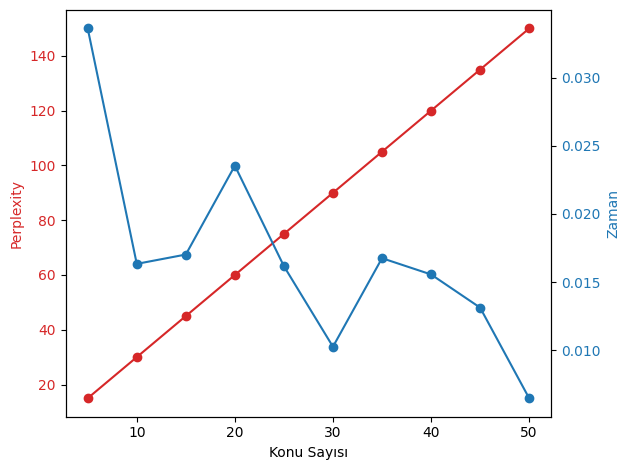

In [5]:
#Uygun Topic sayısının seçimi



#veriyi train ve validation setlerine ayırma
x_train, x_validation = train_test_split(data, test_size=0.2, random_state=42)

#metin verilerini vektörlerştirme
vectorizer = CountVectorizer()
x_train_vectorized=vectorizer.fit_transform(x_train)
x_validation_vectorized=vectorizer.transform(x_validation)  #validation seti vektörleştirme

num_topic_range=[5,10,15,20,25,30,35,40,45,50] #konu sayısı aralığı
validation_perplexity_list=[]
timeElapsed=[]

for num_topics in num_topic_range:
    start_time = time.time()
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(x_train_vectorized)

    validation_perplexity = lda_model.perplexity(x_validation_vectorized)
    validation_perplexity_list.append(validation_perplexity)  


    elapsed_time = time.time() - start_time
    timeElapsed.append(elapsed_time)

#sonuçların görselleştirilmesis

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Konu Sayısı')
ax1.set_ylabel('Perplexity', color=color)
ax1.plot(num_topic_range, validation_perplexity_list, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Zaman', color=color)
ax2.plot(num_topic_range, timeElapsed, color=color, marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [6]:
#Bow
vectorizer = CountVectorizer(min_df=2)
X = vectorizer.fit_transform(processed_documents)
feature_names = vectorizer.get_feature_names_out()

In [7]:
num_topics = 50
lda_model = LatentDirichletAllocation(n_components=num_topics, verbose=0)
lda_model.fit(X)

for topic_id, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_id +1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])
    print("\n")

Topic #1:
['bitiyor', 'çok', 'şarjı', 'çabuk', 'memnun']


Topic #2:
['ürün', 'şey', 'beklemeyin', 'çok', 'bir']


Topic #3:
['için', 'dar', 'aldım', 'büyük', 'çok']


Topic #4:
['çok', 'ürün', 'iyi', 'fiyatına', 'göre']


Topic #5:
['ve', 'oturma', 'geldi', 'çok', 'yeri']


Topic #6:
['kesinlikle', 'yazık', 'bozuldu', 'gün', 'almayın']


Topic #7:
['bir', 'ürün', 've', 'çok', 'kalitesiz']


Topic #8:
['ürün', 'ulaştı', 'elime', 've', 'kullanışlı']


Topic #9:
['ürün', 'tavsiye', 'etmiyorum', 'ettim', 'iade']


Topic #10:
['gayet', 'bir', 'ürün', 'çok', 'güzel']


Topic #11:
['severek', 'icin', 'guzel', 'urun', 'cok']


Topic #12:
['boyu', 'iade', 'ama', 've', 'bir']


Topic #13:
['istediğim', 'gibi', 'bir', 'tam', 'kalite']


Topic #14:
['etmek', 'iade', 'kırık', 'fiyata', 'bu']


Topic #15:
['ama', 'tv', 'çok', 'aldım', 'mario']


Topic #16:
['kaliteli', 'resimde', 'ama', 'gibi', 'değil']


Topic #17:
['de', 'ne', 'ürün', 'cihaz', 'bir']


Topic #18:
['degil', 'rahat', 'göründüğü', '

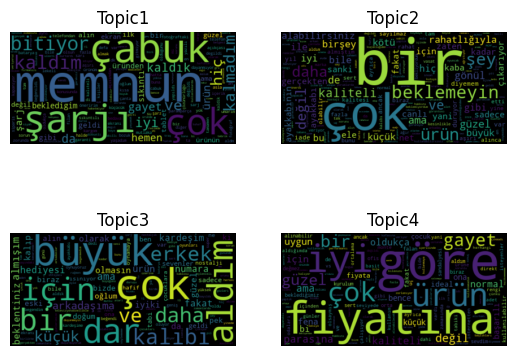

In [8]:
# Kelime bulutları oluşturma
for topic_idx in range(1,5):  
    plt.subplot(2,2,topic_idx)
    wordcloud = WordCloud().generate_from_frequencies(dict(zip(feature_names, lda_model.components_[topic_idx - 1])))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("Topic"+str(topic_idx))
    plt.axis("off")
plt.show()

[[0.01 0.01 0.01 0.01 0.01 0.01 0.51 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]

En büyük değerin konu sayısı: 7
En büyük değer: 0.5099999999999911


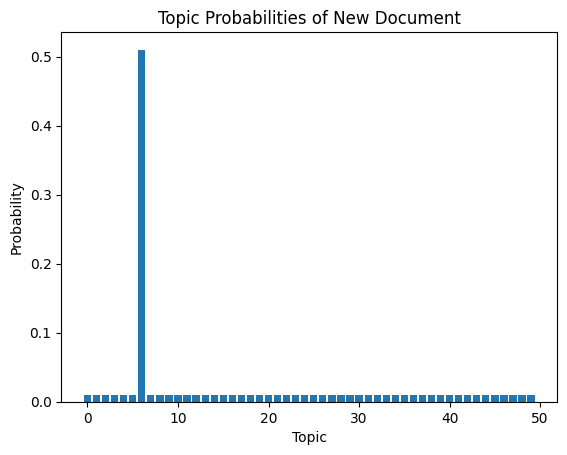

In [9]:
new_document= ["aşırı "]
new_document_processed = preprocess_text(new_document[0])
new_document_vectorized = vectorizer.transform([new_document_processed])
topic_mixture=lda_model.transform(new_document_vectorized)

print(topic_mixture,end="\n\n")

max_index = np.argmax(topic_mixture)
max_value = topic_mixture[0, max_index]
print(f"En büyük değerin konu sayısı: {max_index + 1}")
print(f"En büyük değer: {max_value}")

plt.bar(range(num_topics),topic_mixture.flatten())
plt.xlabel("Topic")
plt.ylabel("Probability")
plt.title("Topic Probabilities of New Document")
plt.show()
